> **SUPPORT VECTOR MACHINE**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import cv2

In [ ]:
data = pd.read_csv("/content/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
100*(round(data.label.astype('category').value_counts()/len(data.index), 4))

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

In [ ]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
description = data.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
from sklearn.preprocessing import scale
X = scale(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.10, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4200, 784)
(37800, 784)
(4200,)
(37800,)


In [ ]:
from sklearn import svm
from sklearn import metrics   
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = svm_linear.predict(x_test)
predictions[:10]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6])

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)
confusion

array([[3615,    0,   12,    8,    8,   28,   28,    5,    9,    2],
       [   0, 4089,   16,   23,    9,    3,    3,   13,   25,    4],
       [  54,   48, 3363,   64,   74,   13,   53,   52,   59,   10],
       [  20,   28,  121, 3387,    8,  175,    5,   54,   58,   44],
       [  12,   12,   26,    2, 3399,    7,   41,   41,    4,  158],
       [  49,   42,   32,  177,   41, 2899,   54,   14,   82,   28],
       [  36,   16,   55,    5,   34,   37, 3486,    3,   21,    0],
       [   9,   27,   37,   22,   70,   10,    4, 3619,   14,  142],
       [  26,   86,   71,  137,   24,  137,   29,   26, 3096,   33],
       [  38,   11,   39,   26,  182,   19,    1,  207,   27, 3228]])

In [ ]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9042592592592592

In [ ]:
class_wise = metrics.classification_report(y_true=y_test, y_pred=predictions)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3715
           1       0.94      0.98      0.96      4185
           2       0.89      0.89      0.89      3790
           3       0.88      0.87      0.87      3900
           4       0.88      0.92      0.90      3702
           5       0.87      0.85      0.86      3418
           6       0.94      0.94      0.94      3693
           7       0.90      0.92      0.91      3954
           8       0.91      0.84      0.88      3665
           9       0.88      0.85      0.87      3778

    accuracy                           0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800



In [ ]:
best_C = 1
best_gamma = 0.001
svm_final = svm.SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_final.fit(x_train, y_train)

SVC(C=1, gamma=0.001)

In [ ]:
predictions = svm_final.predict(x_test)

In [ ]:
confusion = metrics.confusion_matrix(y_true = y_test, y_pred = predictions)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_true=y_test, y_pred=predictions)

print(test_accuracy, "\n")
print(confusion)

0.924973544973545 

[[3587    0   10   10    5   15   50   12   25    1]
 [   0 4108   14   16    5    3    6   18   10    5]
 [  24   23 3407   65   44    5   36  123   54    9]
 [   4   21   86 3502    5   89   11   73   76   33]
 [   3   11   36    7 3450   13   23   43    6  110]
 [  20   29   14  114   18 3020   79   53   36   35]
 [  31   12   11    1   14   34 3521   44   25    0]
 [   4   28   27    8   36    7    1 3739    7   97]
 [  14   59   32   80   22   97   25   44 3251   41]
 [  23   13   13   50   98    7    0  176   19 3379]]


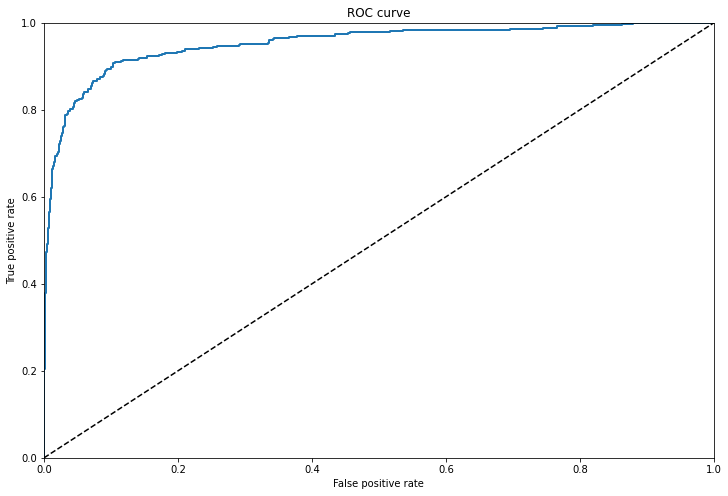

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf =SGDClassifier(max_iter=1000,tol=1e-3,random_state=42)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method='decision_function')
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(12,8))
    plt.title('ROC curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
print("The accuracy score for logistic regression is 0.8769230769230769 , for SVM is 0.924973544973545 ")

The accuracy score for logistic regression is 0.8769230769230769 , for SVM is 0.924973544973545 
